# Lecture 8 - Time Series Forecasting

### Hosted and maintained by [SAAS Berkeley](saas.berkeley.edu)

Authored by [Carlos Gonzalez](carlos01oscar@berkeley.ed)

*This notebook was heavily inspired by [flo7up](https://github.com/flo7up), as well as UC Berkeley's STAT 153.*

### But first - a [Youtube video!](https://www.youtube.com/watch?v=wGUV_XqchbE&ab_channel=DataScienceDojo)

Time series forecasting presents a complex challenge, but **ARIMA** (Auto-Regressive Integrated Moving Average) has been a trusted model for dealing with this task for decades. This statistical technique shines when your time series exhibits clear patterns like seasonal shifts in weather or sales. ARIMA's versatility has allowed it to forecast everything from  production sales to inventory orders. Today, we'll explore how to construct an ARIMA model in Python to make predictions with ease.

**ARIMA** is like a method where you try to predict, for instance, tomorrow's temperature by:

- Looking at the temperatures of the past few days.

- Removing long-term patterns (like global warming).

- Adjusting your guess based on how off your previous predictions were.

First, we'll unpack how ARIMA operates, the role of stationarity, and when to reach for ARIMA in your toolkit. Using a time series of beer sales, we will be projecting quantities into the future.

We'll start by assessing if the data is stationary. We'll then fit an ARIMA forecasting model to the training data. Finally, we'll tap into the model's forecasts and score its performance.

### About Sales Forecasting

Sales prediction is vital for businesses, as it estimates the upcoming demand for a product or service, like beer. This process employs advanced methods, including machine learning and time series analysis, to delve deep into past sales records. Such predictions are central to business functioning. They inform crucial choices about production, inventory, staffing, and more. Accurate sales estimates help businesses maintain just the right inventory level, ensuring they meet consumer needs without excess production or stockpiling.

### Introduction to ARIMA Time Series Modeling

ARIMA models provide an alternative approach to time series forecasting that differs significantly from machine learning methods. Working with ARIMA requires a good understanding of Stationarity and knowledge of the transformations used to make time-series data stationary.

*Now, what is stationarity?*

**Stationarity** is an essential concept in stochastic processes that describes the nature of a time series. We consider a time series strictly stationary if its statistical properties do not change over time. In this case, summary statistics, such as the mean and variance, do not change over time. However, the time-series data we encounter in the real world often show a trend or significant irregular fluctuations, making them non-stationary or weakly stationary.

Stationarity: shifting the time axis does not affect the distribution.

*Cool! What is a stochastic process?*

**Stochastic processes** is any process that produces outcomes based on a distribution of potential outcomes, rather than a predetermined outcome. Let's break that down.

A process is something that takes inputs and transforms them into outputs. Stochastic basically means "random." However, random doesn't mean "anything goes," it usually means that it follow some kind of distribution, like a normal distribution or an exponential distribution.

The opposite of a stochastic process is a **deterministic process**. If you press "x" on your keyboard, it prints x on the computer screen, every time (assume everything is working normally). The input is a button press, the output is a letter on a screen, and it's always the same.

*So why is stationarity such an essential concept for ARIMA?*

If a time series is stationary, we can assume that the past values of the time series are predictive of future development. In other words, a **stationary time series exhibits consistent behavior that makes it predictable**. On the other hand, a non-stationary time series is characterized by a kind of random behavior that will be difficult to capture in modeling. Namely, if random movements characterized the past, there is a high probability that the future will be no different.

Fortunately, in many cases, it is possible to transform a time series that is non-stationary into a stationary form and, in this way, build better prediction models.

### Defining the ARIMA Model

ARIMA uses autoregression (AR), integration (differencing), and moving averages (MA) to fit a linear regression model to a time series.

ARIMA Parameters
The default notation for ARIMA is a model with parameters `p`, `d`, and `q`, whereby each parameter takes an integer value:


`p` (order of the AR terms): The autoregressive process describes the dependent relationship between an observation and several lagged observations (lags). Predictions are then based on past data from the same time series using linear functions. `p=1` means the model uses values that lag by one period. This is like looking back at your past footsteps to predict where you'll step next. The number `p` tells you how many footsteps you're looking back. If `p=1`, you're only looking at the last step to predict the next one.

`d` (differencing): In the case of a non-stationary time series, there is a chance to remove a trend from the data by differencing once or several times, thus bringing the data to a stationary state. The model parameter d determines the order of the differentiation. A value of d = 0 simplifies the ARIMA model to an ARMA model, lacking the integration aspect. If this is the case, we do not need to integrate the function because the time series is already stationary. Think of this as a "smoothing" step. If your data has big ups and downs or trends that make it hard to predict, you can use differencing to make it flatter and easier to work with. The number `d` tells you how many times you do this smoothing process. If `d=0`, it means your data is already flat and doesn't need any smoothing.


`q` (order of the MA terms): The parameter q determines the number of lagged forecast errors in the prediction equation. In contrast to the AR process, the MA process assumes that values at a future point in time depend on the errors made by predictions at current and past points in time. This means that it is not previous events that determine the predictions but rather the previous estimation or prediction errors used to calculate the following time series value. Imagine you've been predicting the weather. The MA term is like considering how wrong you were in your past predictions to improve your next prediction. The number `q` tells you how many past mistakes you're considering. So if `q=1`, you're only considering your last mistake to make a better forecast today.

### SARIMA

In the real world, many time series have seasonal effects. Examples are monthly retail sales figures, temperature reports, weekly airline passenger data, etc. To consider this, we can specify a seasonal range (e.g., `m=12` for monthly data) and additional seasonal AR or MA components for our model that deal with seasonality. Such a model is also called a **SARIMA** model, and we can define it as a model(p, d, q)(P, D, Q)[m].

Imagine you're trying to predict the number of ice cream cones sold each month. Naturally, more cones are sold in summer and fewer in winter. This predictable pattern that repeats every year is what we call a "seasonal effect."

**SARIMA** is like an upgraded version of the ARIMA model, built specifically to handle these repeating patterns.

### Auto-(S)ARIMA

When working with **(S)ARIMA**, we can set the model parameters manually or use auto-ARIMA and let the model search for the optimal parameters.

**What are some examples of stochastic processes?**

*your respone here*

**What are some examples of deterministic processes?**

*your response here*

# Step 1: Load Time Series Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})


df = pd.read_csv("BeerWineLiquor.csv")
df.head()

date  beer
0  1/1/1992  1509
1  2/1/1992  1541
2  3/1/1992  1597
3  4/1/1992  1675
4  5/1/1992  1822

As shown above, the sales figures in this dataset stem from the first day of each month.

# Step 2: Visualize the Time-Series and Check it for Stationarity

Before modeling the sales data, we visualize the time series and test it for Stationarity.

First, we will look at the different components of the time series. We do this by using the seasonal_decompose function of the statsmodels library.

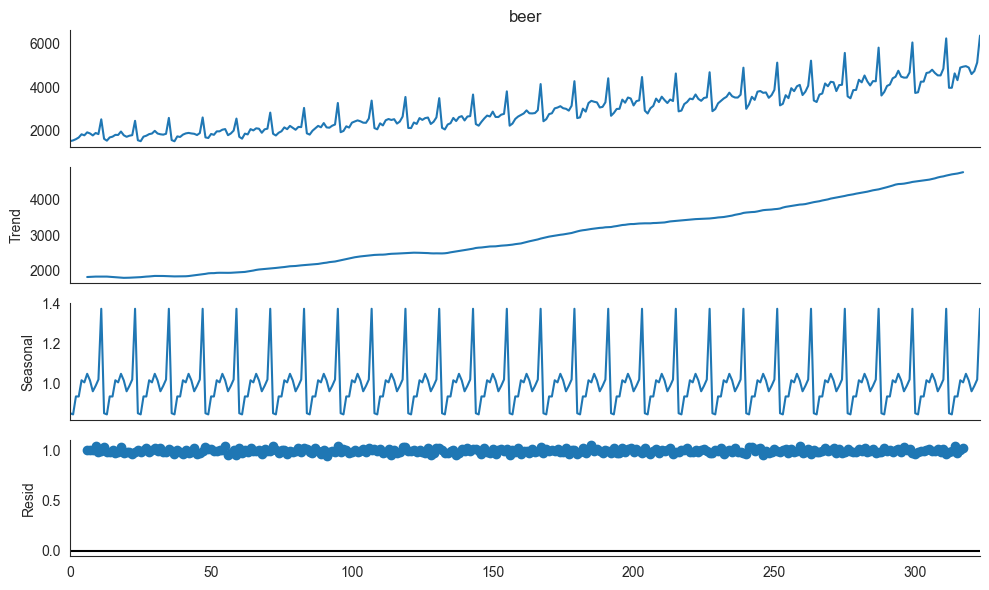

In [3]:
# Decompose the time series
plt.rcParams["figure.figsize"] = (10,6)
result = seasonal_decompose(df['beer'], model='multiplicative', period = 12)
result.plot()
plt.show()

To test for stationarity, we use the **Augmented Dickey-Fuller** test.

*Knowing the mathematic formulation of this hypothesis test is out-of-scope, so we're abstracting it here.*

### Hypothesis Testing

A hypothesis test is a statistical method used to make inferences or draw conclusions about populations based on sample data. It's a way to test an assumption or theory about a parameter of interest.


Null Hypothesis (**$H_0$**): This is a statement that there is no effect or no difference, and it serves as the default or status quo assumption.

Alternative Hypothesis (**$H_1$**): This is what you want to prove — that there is an effect or a difference.

If the test is "significant," you reject the null hypothesis in favor of the alternative.
If the test is not significant, you do not have enough evidence to reject the null hypothesis.

**What would the null hypothesis $(H_0)$ be for the ADF Test?**

*your response here*

**And the alternative?**

*your response here*

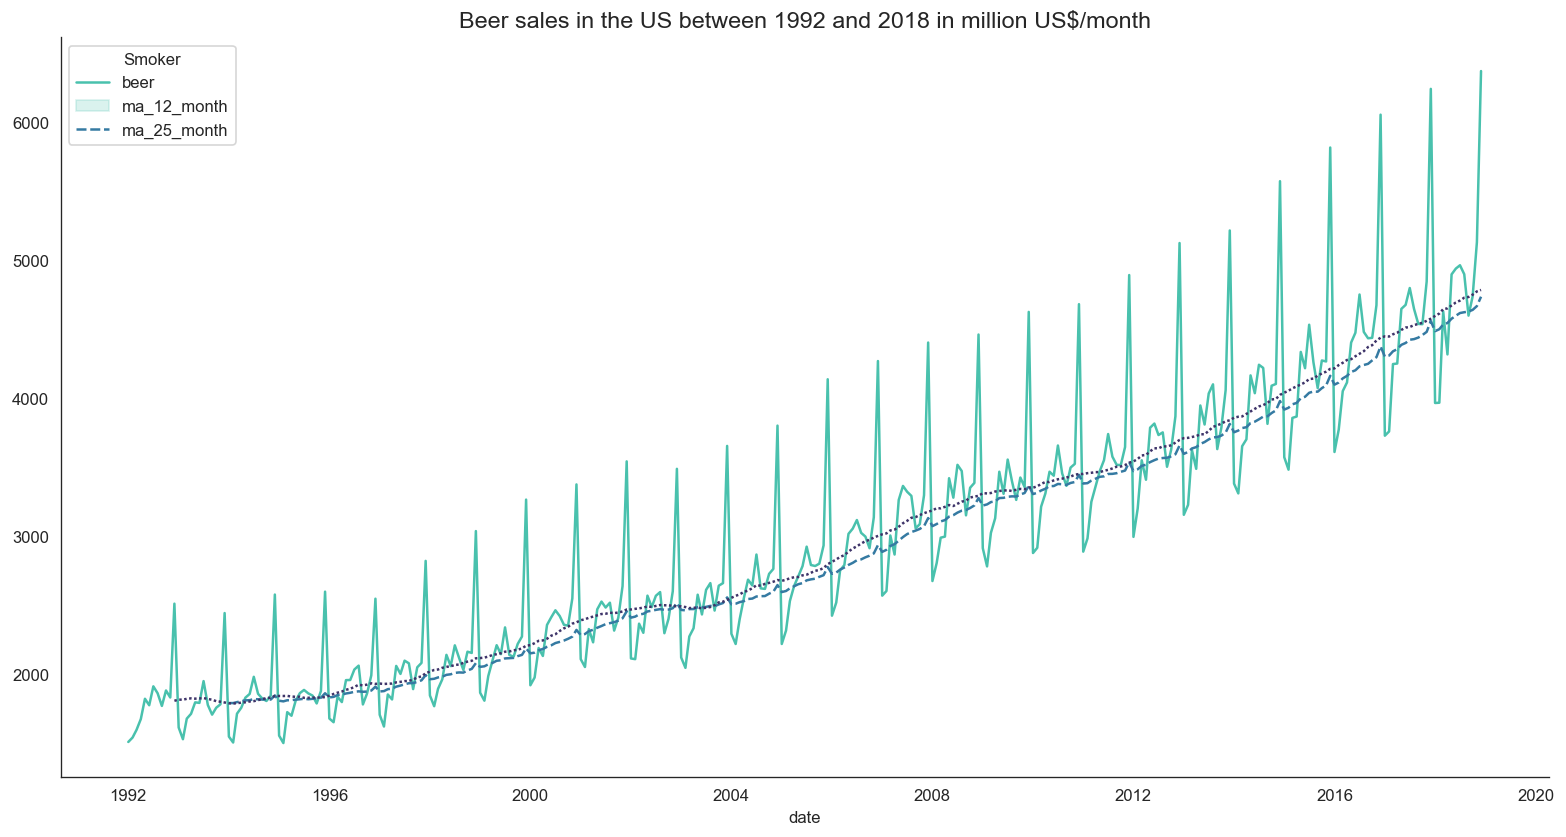

(0.01914324756116069, False)


In [12]:
def check_stationarity(df_sales, title_string, labels):
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title(title_string, fontsize=14)
    if df_sales.index.size > 12:
        df_sales['ma_12_month'] = df_sales['beer'].rolling(window=12).mean()
        df_sales['ma_25_month'] = df_sales['beer'].rolling(window=25).mean()
        sns.lineplot(data=df_sales[['beer', 'ma_25_month', 'ma_12_month']], palette=sns.color_palette("mako_r", 3))
        plt.legend(title='Smoker', loc='upper left', labels=labels)
    else:
        sns.lineplot(data=df_sales[['beer']])
    
    plt.show()
    
    sales = df_sales['beer'].dropna()
    # Perform an Ad Fuller Test
    # the default alpha = .05 stands for a 95% confidence interval
    adf_test = pm.arima.ADFTest(alpha = 0.05) 
    print(adf_test.should_diff(sales))
    
df_sales = pd.DataFrame(df['beer'], columns=['beer'])
df_sales.index = pd.to_datetime(df['date']) 
title = "Beer sales in the US between 1992 and 2018 in million US$/month"
labels = ['beer', 'ma_12_month', 'ma_25_month']
check_stationarity(df_sales, title, labels)

Visualization helps us choose the parameters for our ARIMA model, thus making it an essential step.


The data (does / does not) appear to be stationary. *(bold the correct option)* 

**Explain your reasoning:**

*your response here*

We know that the time series has a seasonal component. Therefore, we need to define additional parameters and construct a SARIMA model.

Before we use auto-correlation to determine the optimal parameters, we will try manual differencing to make the time series stationary. There is no guarantee that differencing works. It is essential to remember that differencing can sometimes also worsen prediction performance. So be careful, not to overdifference! We could also trust that the auto-ARIMA model chooses the best parameters for us. However, we should always validate the selected parameters.

The ideal differencing parameter is the least number of differencing steps to achieve a stationary time series. We will monitor the results with autocorrelation plots to check whether differencing was successful.

# Step 3: Exemplary Differencing and Autocorrelation

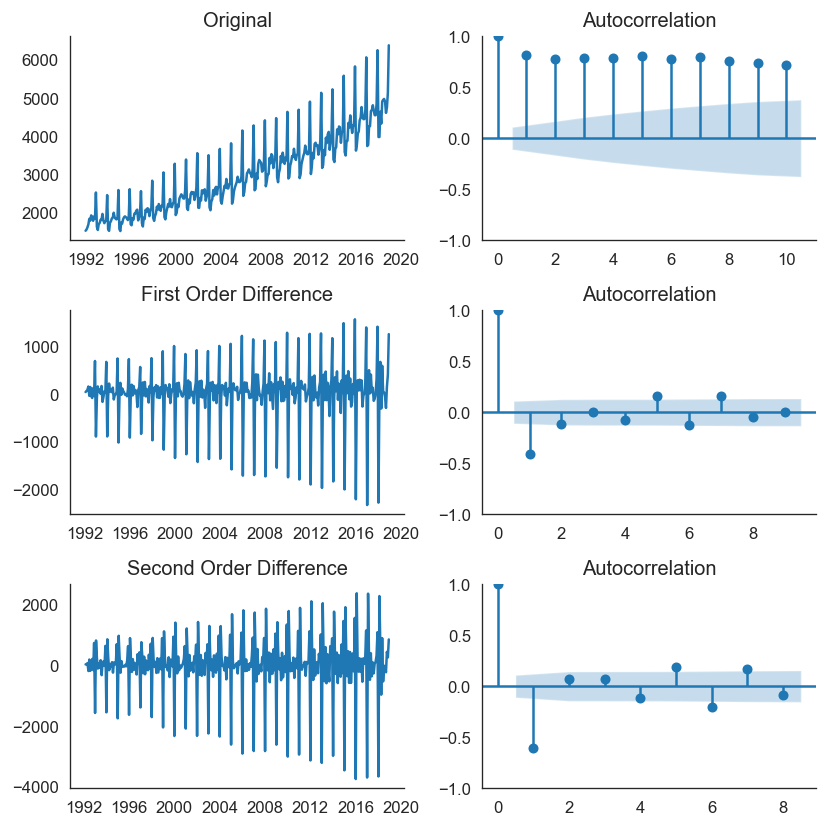

In [5]:
# 3.1 Non-seasonal part
def auto_correlation(df, prefix, lags):
    plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':120})
    
    # Define the plot grid
    fig, axes = plt.subplots(3,2, sharex=False)

    # First Difference
    axes[0, 0].plot(df)
    axes[0, 0].set_title('Original' + prefix)
    plot_acf(df, lags=lags, ax=axes[0, 1])

    # First Difference
    df_first_diff = df.diff().dropna()
    axes[1, 0].plot(df_first_diff)
    axes[1, 0].set_title('First Order Difference' + prefix)
    plot_acf(df_first_diff, lags=lags - 1, ax=axes[1, 1])

    # Second Difference
    df_second_diff = df.diff().diff().dropna()
    axes[2, 0].plot(df_second_diff)
    axes[2, 0].set_title('Second Order Difference' + prefix)
    plot_acf(df_second_diff, lags=lags - 2, ax=axes[2, 1])
    plt.tight_layout()
    plt.show()
    
auto_correlation(df_sales['beer'], '', 10)

**Original Data:**

The *top-left* plot displays the original beer sales data over time. As expected, there's a visible seasonal pattern.


The *top-right* plot (auto-correlation) helps us see how much past sales can predict future sales.

**First Order Difference:**

The *middle-left* plot shows the data after subtracting each month's sales from the previous month's. It seems to have reduced the seasonal pattern a bit.

The *middle-right* plot (auto-correlation) shows that the influence of past months on future predictions is reduced after the first differencing. **The lag, or difference in this case, dips significantly after the the first iteration, which tells us that this could be a result of over-differencing.**


**Second Order Difference:**

The *bottom-left* plot displays the data after subtracting twice. The data is flatter but might be too "diffused" for practical prediction purposes.

The *bottom-right* plot (auto-correlation) further indicates that the influence of past months has diminished significantly after the second differencing We also see that the lag has dipped even more after first-order differencing.

Next, we perform the same procedure for the seasonal part of our time series.

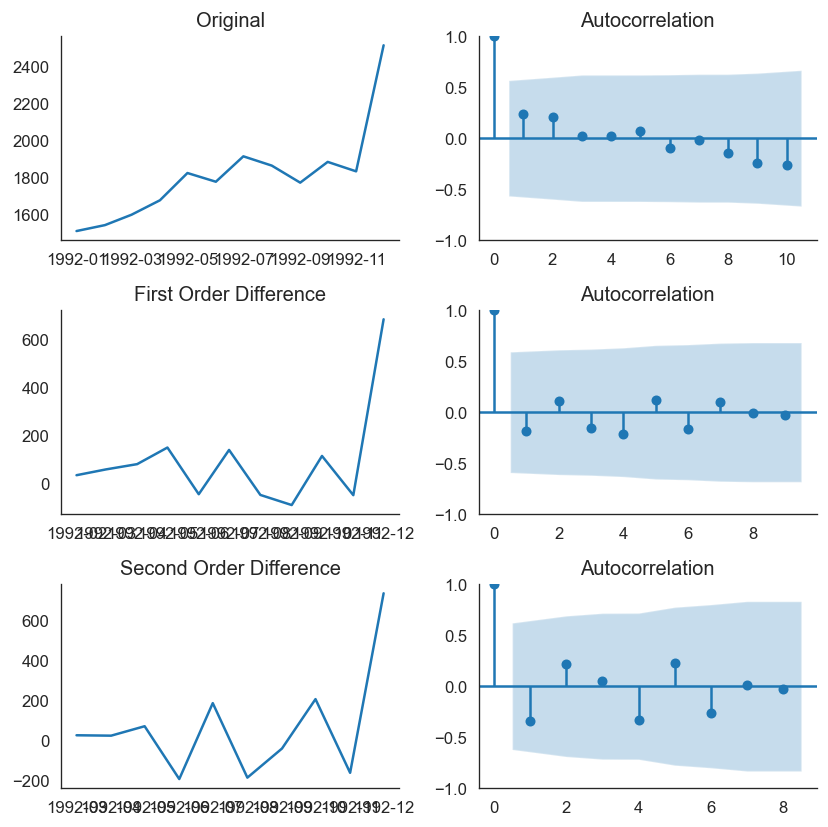

In [6]:
# Reduce the timeframe to a single seasonal period
df_sales_s = df_sales['beer'][0:12]

# Autocorrelation for the seasonal part
auto_correlation(df_sales_s, '', 10)

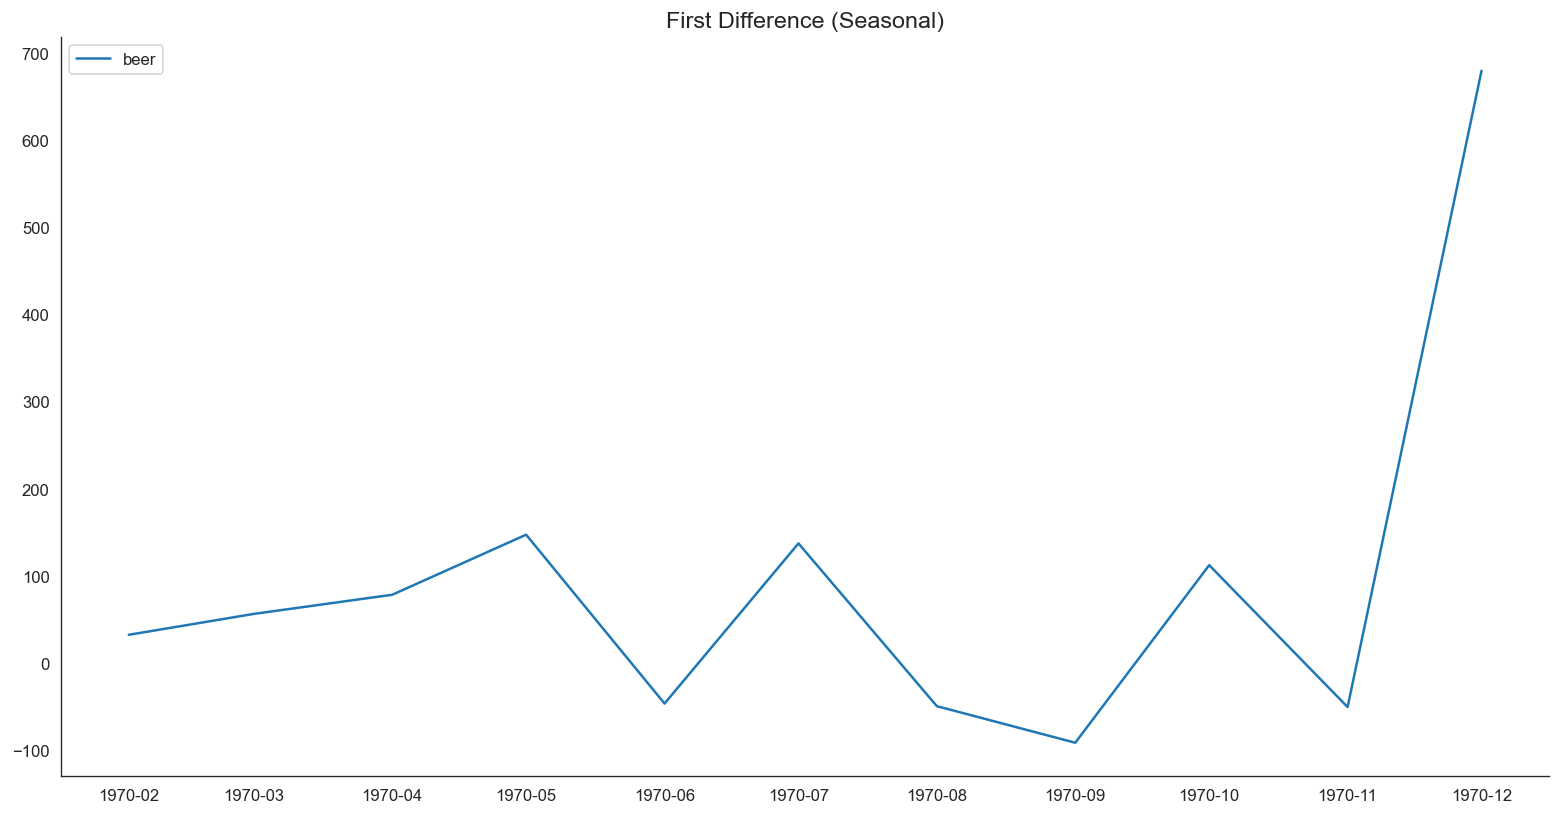

(0.99, True)


In [7]:
# Check if the first difference of the seasonal period is stationary
df_diff = pd.DataFrame(df_sales_s.diff())
df_diff.index = pd.date_range(df_sales_s.diff().iloc[1], periods=12, freq='MS') 
check_stationarity(df_diff, "First Difference (Seasonal)", ['difference'])

The first order difference seems to strike a good balance in making the data stationary while retaining its predictive power. The second order difference might be overkill in this case, as the predictive influence of past months becomes too weak.​

# Step 4: Finding an Optimal Model with Auto-ARIMA

Now, let's auto-fit the ARIMA model to our time series. This way, we ensure that we can later measure the performance of our model against a fresh set of data that the model has not seen so far. We will split our dataset into train and test in preparation for this.

Once we have created the train and test data sets, we can configure the parameters for the `auto_arima` stepwise optimization. By setting max_d = 1, we tell the model to test no-differencing and first-order differencing. Also, we set max_p and max_q to 3.

To deal with the seasonality in our time series, we set the `seasonal` parameter to `True` and the `m` parameter to 12 data points. We turn our model into a SARIMA model that allows us to configure additional `D`, `P`, and `Q` parameters. We define a max value for `Q` and `P` of 3. Previously we have already seen that further differencing does not improve the Stationarity. Therefore, we can set the value of `D` to 1.

After configuring the parameters, we next fit the model to the time series. The model will try to find the optimal parameters and choose the model with the least AIC.

In [8]:
# split into train and test
pred_periods = 30
split_number = df_sales['beer'].count() - pred_periods # corresponds to a prediction horizion  of 2,5 years
df_train = pd.DataFrame(df_sales['beer'][:split_number]).rename(columns={'beer':'y_train'})
df_test = pd.DataFrame(df_sales['beer'][split_number:]).rename(columns={'beer':'y_test'})

# auto_arima
model_fit = pm.auto_arima(df_train, test='adf', 
                         max_p=3, max_d=3, max_q=3, 
                         seasonal=True, m=12,
                         max_P=3, max_D=2, max_Q=3,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

# summarize the model characteristics
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3383.210, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3351.655, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3364.350, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3604.145, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3349.908, Time=0.08 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=3351.532, Time=0.14 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=3353.520, Time=0.52 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=3312.656, Time=0.08 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=3314.483, Time=0.25 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=3314.378, Time=0.14 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=3305.552, Time=0.73 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=3291.425, Time=2.28 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3306.914, Time=1.74 sec
 ARIMA(2,0,0)(3,1,1)[12]

Auto-ARIMA has determined that the best model is (3,0,0)(3,1,1). These results match when we manually performed differencing!!!


**ARIMA(3,0,0)**: This means the model uses the current value and three previous values (lags) in the non-seasonal part of the data to predict the next value. No differencing (d=0) was applied.

**SARIMA(3,1,1)[12]**: The seasonal part of the model uses three previous seasonal values (lags) and the difference between the current value and the value 12 months ago to predict the next value. The [12] indicates a yearly seasonality (since the data is monthly).

### So what does all of this mean?

The best way to make a prediction, according to the model, is to look at:

- The sales from the current month and the two previous months.
- The sales from the same month in the previous three years.
- The change in sales from 12 months ago.

The model also looks at the errors it made in the last year's predictions to fine-tune the current prediction. It uses all these factors and weighs them differently (based on the coefficients) to make the best prediction.

# Step 5: Simulate the Time Series with in-sample Forecasting

Now that we have trained our model, we want to use it to simulate the entire time series. We will do this by calling the `predict_in_sample` function. The prediction will match the same period as the original time series with which we trained the model. Because the model predicts one step, the prediction results will naturally be close to the actual values.

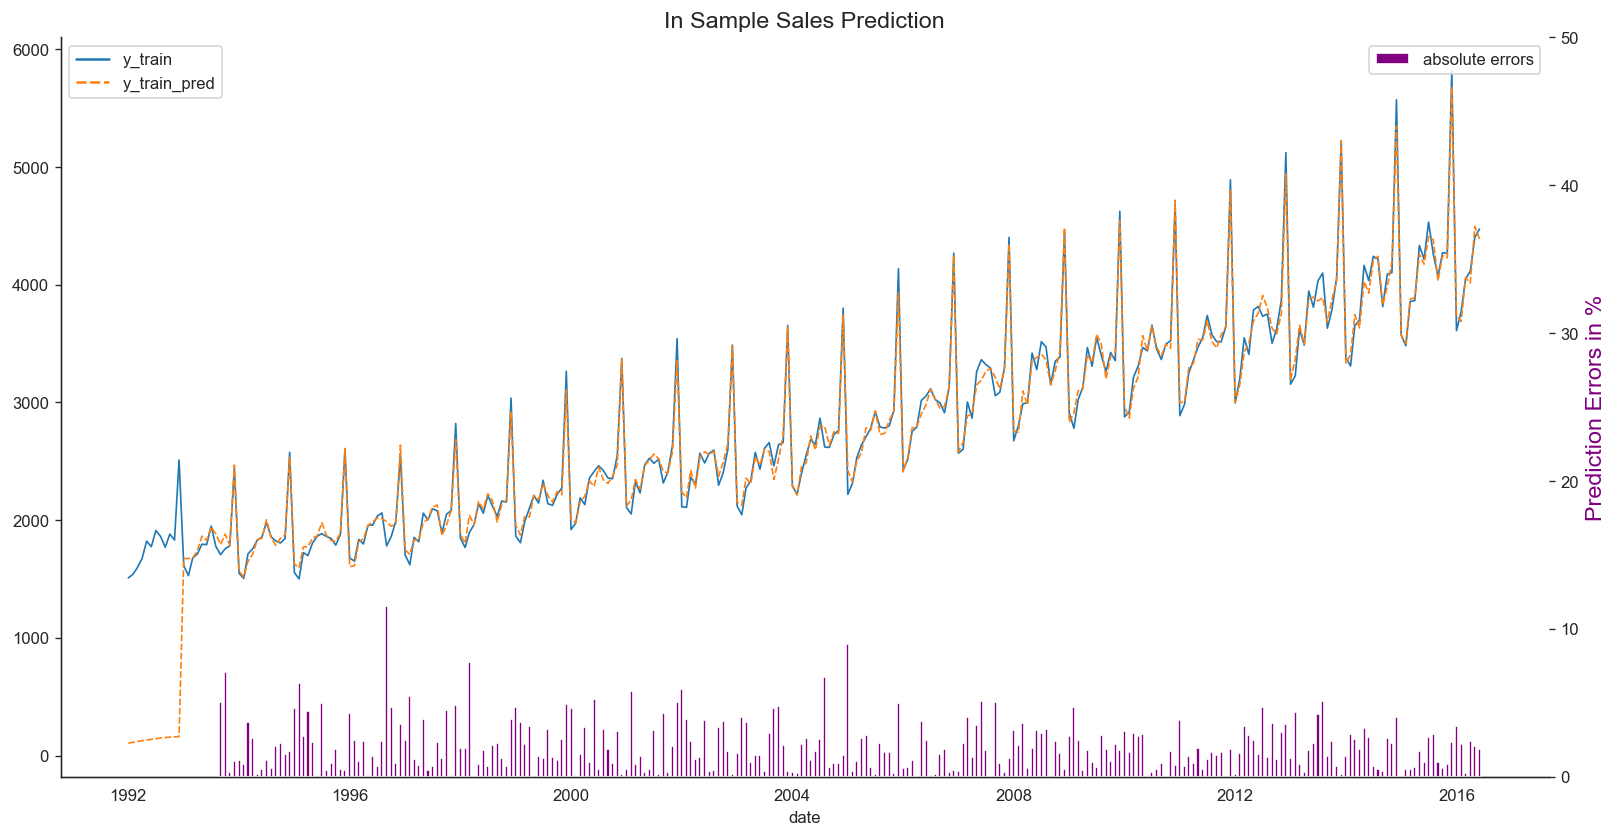

In [9]:
# Generate in-sample Predictions
# The parameter dynamic=False means that the model makes predictions upon the lagged values.
# This means that the model is trained until a point in the time-series and then tries to predict the next value.
pred = model_fit.predict_in_sample(dynamic=False) # works only with auto-arima
df_train['y_train_pred'] = pred

# Calculate the percentage difference
df_train['diff_percent'] = abs((df_train['y_train'] - pred) / df_train['y_train'])* 100

# Print the predicted time-series
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("In Sample Sales Prediction", fontsize=14)
sns.lineplot(data=df_train[['y_train', 'y_train_pred']], linewidth=1.0)

# Print percentage prediction errors on a separate axis (ax2)
ax2 = ax1.twinx() 
ax2.set_ylabel('Prediction Errors in %', color='purple', fontsize=14)  
ax2.set_ylim([0, 50])
ax2.bar(height=df_train['diff_percent'][20:], x=df_train.index[20:], width=20, color='purple', label='absolute errors')
plt.legend()
plt.show()

# Step 6: Generate and Visualize a Sales Forecast

Now that we have trained an optimal model, we are ready to generate a sales forecast. First, we specify the number of periods that we want to predict. In addition, we create an index from the number of predictions adjacent to the original time series and continue it (prediction_index).

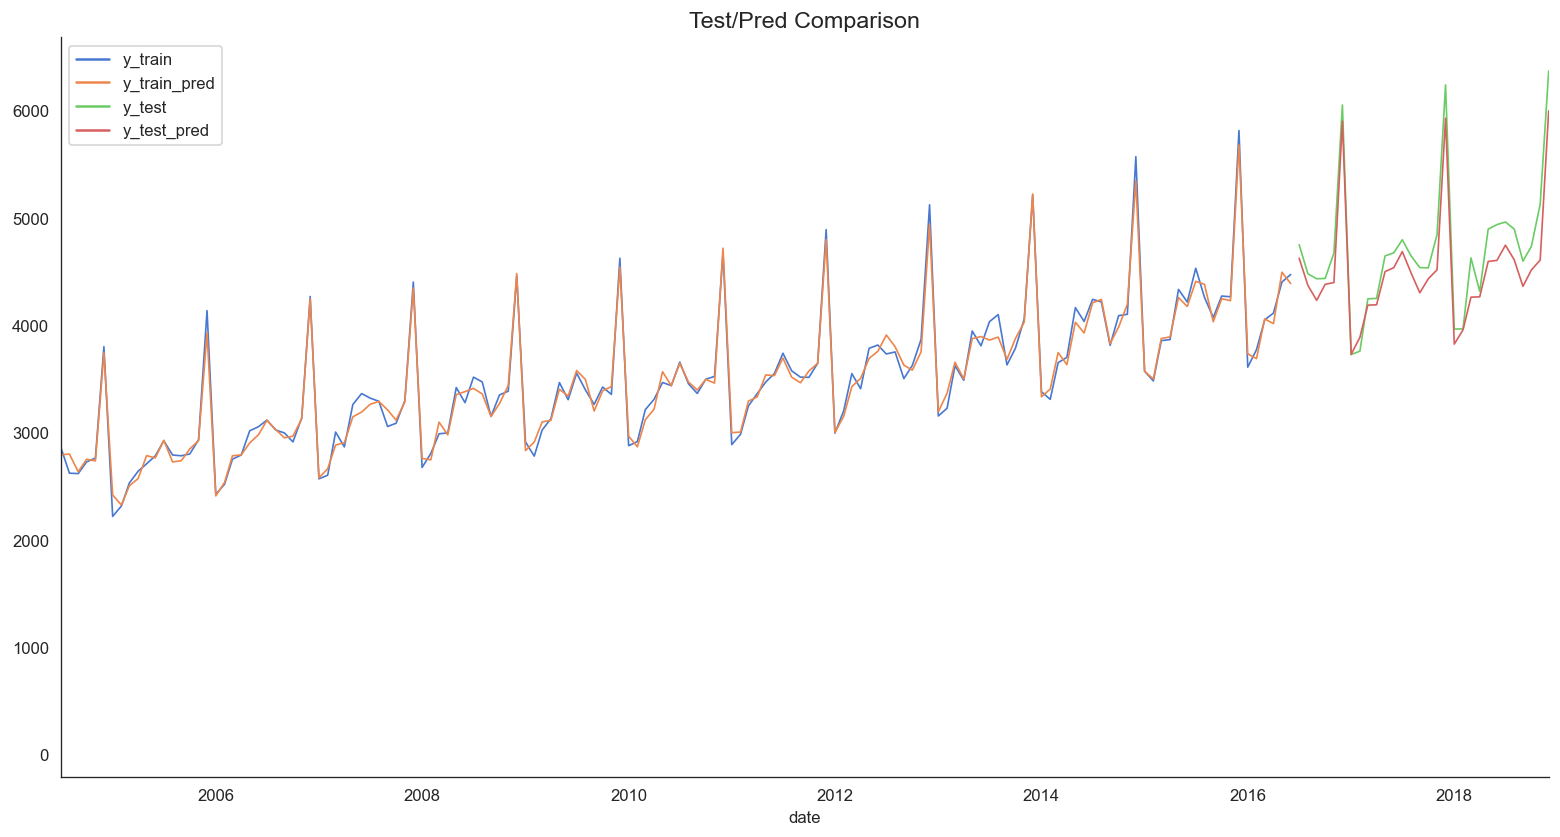

In [10]:
# Generate prediction for n periods, 
# Predictions start from the last date of the training data
test_pred = model_fit.predict(n_periods=pred_periods, dynamic=False)
df_test['y_test_pred'] = test_pred
df_union = pd.concat([df_train, df_test])
df_union.rename(columns={'beer':'y_test'}, inplace=True)

# Print the predicted time-series
fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Test/Pred Comparison", fontsize=14)
sns.despine();
sns.lineplot(data=df_union[['y_train', 'y_train_pred', 'y_test', 'y_test_pred']], linewidth=1.0, dashes=False, palette='muted')
ax.set_xlim([df_union.index[150],df_union.index.max()])
plt.legend()
plt.show()

As shown above, our model’s forecast continues the seasonal pattern of the beer sales time series.

# Step #7 Measure Performance

The Mean Absolute Percentage Error (MAPE) is a popular metric for measuring the accuracy of time series models, because it doesn't depend on the scale of your data. This means whether you're predicting sales of millions of dollars or temperatures in the range of 0-100°F, a MAPE of 5% still means your predictions are off by 5% on average.

In [11]:
# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(df_test['y_test'], df_test['y_test_pred'])/ df_test['y_test']))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(df_test['y_test'], df_test['y_test_pred'])/ df_test['y_test'])) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Mean Absolute Percentage Error (MAPE): 3.94 %
Median Absolute Percentage Error (MDAPE): 3.49 %


The percent errors show that our ARIMA model achieves a decent predictive performance!

### Acknowledgements

Charu C. Aggarwal (2018) Neural Networks and Deep Learning


Jansen (2020) Machine Learning for Algorithmic Trading: Predictive models to extract signals from market and alternative data for systematic trading strategies with Python


Aurélien Géron (2019) Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems


David Forsyth (2019) Applied Machine Learning Springer


Andriy Burkov (2020) Machine Learning Engineering